# TP2 - Ej 3

> Integrantes:

- Aleo, Rodrigo
- Bustillo, Mario
- Luna, Juan Ignacio

> Consigna:

Implementar un sistema de inferencia difusa para controlar un péndulo invertido

● Asuma que el carro no tiene espacio restringido para moverse

● Definir variables lingüísticas de entrada y salida, particiones borrosas, operaciones borrosas para la conjunción, disyunción e implicación, reglas de inferencia (cubrir todas las posibles combinaciones de valores borrosos de entrada en la base de reglas)

● Utilice el siguiente modelo del sistema carro-péndulo

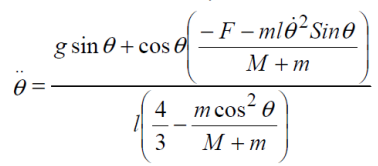

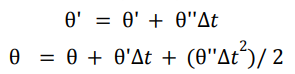

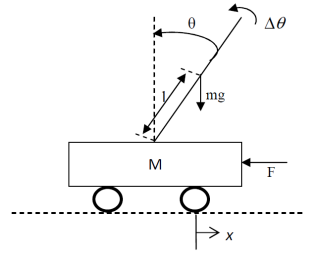

## Importaciones

In [1]:
import random
import pygame
import math
import sys
import numpy as np

pygame 2.1.2 (SDL 2.0.18, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Variables globales

In [2]:
# Inicialización de Pygame
pygame.init()

# Definición de las constantes del programa
window_width = 800
window_height = 600

cart_width = 80
cart_height = 50
cart_y = window_height /2
cart_x = window_width / 2 - cart_width / 2
cart_mass = 500
cart_speed = 0
cart_acceleration = 0
cart_friction = 0.01
cart_k = 2 #Hice que la fuerza de friccion sea proporcional a 

pendulum_length = 100
pendulum_radius = 20
pendulum_mass = 0.0001
pendulum_theta = 0#3/2*np.pi
pendulum_omega = 0
pendulum_alpha = 0
pendulum_friction = 0.1

g=9.81*1000

F = 0
F_modulo = 50

# Definición de los colores utilizados
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)

# Creación de la ventana del juego
window = pygame.display.set_mode((window_width, window_height))

# Definición del reloj del juego
clock = pygame.time.Clock()

last_ticks = 90
fps = 60
dt = 1/fps

In [3]:
# Función para actualizar la posición y velocidad del péndulo
def update_pendulum():
    global pendulum_theta, pendulum_omega, pendulum_alpha, F, last_ticks
    
    # Cálculo de la fuerza neta sobre el péndulo
    g = 9.81
    
    numerador = g * np.sin(pendulum_theta) + np.cos(pendulum_theta) * ((- F - pendulum_mass * pendulum_length * np.power(pendulum_omega,2) * np.sin(pendulum_theta)) / (cart_mass*pendulum_mass)) - pendulum_friction * pendulum_omega
    denominador = pendulum_length * (4/3 - (pendulum_mass * np.power(np.cos(pendulum_theta), 2)) / (pendulum_mass + cart_mass))

    pendulum_alpha = numerador/denominador


    current_ticks = pygame.time.get_ticks()
    dt = (current_ticks - last_ticks) / 1000.0  # convierte los milisegundos a segundos
    last_ticks = current_ticks

    # Actualización de la velocidad y posición angular del péndulo
    pendulum_omega += pendulum_alpha * dt
    pendulum_theta += pendulum_omega * dt + pendulum_alpha * np.power(dt,2)/2
    #pendulum_theta+=0.01
    # Actualización de la posición del péndulo
   
    pendulum_x = cart_x + cart_width/2 + pendulum_length * math.sin(pendulum_theta)
    pendulum_y = cart_y - pendulum_length * math.cos(pendulum_theta)
    
    # Dibujado del péndulo
    pygame.draw.line(window, WHITE, (int(cart_x) + cart_width / 2, cart_y), (int(pendulum_x), int(pendulum_y)), 5)
    pygame.draw.circle(window, WHITE, (int(pendulum_x), int(pendulum_y)), pendulum_radius)

In [4]:
# def update_pendulum():
#     global pendulum_theta, pendulum_omega, pendulum_alpha, pendulum_mass
#     global F
#     global cart_x, cart_y, cart_mass
#     global last_ticks

#     m=pendulum_mass
#     M=cart_mass
#     L=pendulum_length
#     theta=pendulum_theta
#     omega=pendulum_omega

#     # Calcula el tiempo transcurrido desde el último frame
#     current_ticks = pygame.time.get_ticks()
#     dt = (current_ticks - last_ticks) / 1000.0  # convierte los milisegundos a segundos
#     last_ticks = current_ticks

#     # Calcula la aceleración angular del péndulo
#     num = -g*(m+M)*np.sin(theta) - F*L*np.cos(theta)*np.sin(theta)
#     den = L*(m+M) - M*L*np.cos(theta)**2
#     alpha = num/den

#     # Integra las ecuaciones de movimiento para el péndulo
#     theta += omega*dt
#     omega += alpha*dt

#     # Dibuja el péndulo en la pantalla
#     pendulum_x = cart_x + cart_width/2 + pendulum_length * math.sin(pendulum_theta)
#     pendulum_y = cart_y - pendulum_length * math.cos(pendulum_theta)

#     # Dibujado del péndulo
#     pygame.draw.line(window, WHITE, (int(cart_x) + cart_width / 2, cart_y), (int(pendulum_x), int(pendulum_y)), 5)
#     pygame.draw.circle(window, WHITE, (int(pendulum_x), int(pendulum_y)), pendulum_radius)

In [5]:
# Función para actualizar la posición y velocidad del carrito
def update_cart():
    global cart_x, cart_speed, F
    
    # Cálculo de la aceleración del carrito
    F_friccion_carrito = cart_mass * cart_friction * (cart_k * cart_speed) #Hice que la fricción sea proporcional a la velocidad por un factor k.

    # if cart_speed>0:
    F_neta_carrito = F - F_friccion_carrito
    # if cart_speed<0:
    #     F_neta_carrito = F + F_friccion_carrito
    # if cart_speed==0:
    #     F_neta_carrito = F
    
    cart_acceleration = F_neta_carrito/cart_mass
    cart_speed += cart_acceleration
    cart_x += cart_speed
        
    
    # Restricción de los límites del carrito
    if cart_x < 0:
        cart_x = 0
        cart_speed = 0
    elif cart_x > window_width - cart_width:
        cart_x = window_width - cart_width
        cart_speed = 0
    
    # Dibujado del carrito
    pygame.draw.rect(window, RED, (int(cart_x), int(cart_y), cart_width, cart_height))
    pygame.draw.circle(window, WHITE, (int(cart_x+12), int(cart_y+cart_height+2)), 10)
    pygame.draw.circle(window, WHITE, (int(cart_x+cart_width-12), int(cart_y+cart_height+2)), 10)

    #pygame.draw.circle(window, RED, (int(cart_x) + cart_width / 2, cart_y), pendulum_length)

    #Suelo del carrito
    pygame.draw.rect(window, WHITE, (0, int(cart_y+cart_height+12), window_width, 5))

In [6]:
def calculo_fuerza(keys_pressed):
    global F, F_modulo

    if keys_pressed[pygame.K_LEFT]:
        F = -F_modulo
    elif keys_pressed[pygame.K_RIGHT]:
        F = F_modulo
    else:
        F = 0

In [7]:
run = True
while run:
# Manejo de eventos de Pygame
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
        
        # Actualización de la posición del péndulo y del carrito
        keys_pressed = pygame.key.get_pressed()
    
    calculo_fuerza(keys_pressed)
    window.fill(BLACK)
    update_cart()
    update_pendulum()

    # Actualización de la ventana del juego
    pygame.display.update()
    clock.tick(fps)

pygame.quit()
sys.exit()

SystemExit: 

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Funciones de dibujo


### Main

# EJECUCION

NameError: name 'main' is not defined

: 